In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import copy

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Summer22_FootballTransfers.csv')
df.head(4)


,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,€50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,€30.00m,9/1/2022


In [16]:
df.dropna()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000,9/1/2022
...,...,...,...,...,...,...,...,...,...,...,...
33619,Moses Usor,Right Winger,20.0,SK Slavia Prague B,FNL,Czech Republic,SK Slavia Prague,Fortuna Liga,Czech Republic,100000,7/1/2022
33621,Ovidiu Agapie,Left Winger,17.0,Ripensia Timisoara U19,Romania,Romania,Ripensia Timisoara,Liga 2,Romania,10000,7/1/2022
33622,Rares Butnarasu,Right-Back,16.0,Ripensia Timisoara U19,Romania,Romania,Ripensia Timisoara,Liga 2,Romania,10000,7/1/2022
33623,Marin Petkov,attack,18.0,Cherno More Varna U19,Bulgaria,Bulgaria,Cherno More Varna II,Bulgaria,Bulgaria,10000,7/1/2022


In [4]:
df.dropna(subset=["cost"],inplace=True)


In [5]:
df=df[df["cost"].str.contains("Loan fee")==False]
df=df[df["cost"].str.contains("-")==False]
df=df[df["cost"].str.contains("\?")==False]
df=df[df["cost"].str.contains("loan transfer")==False]
df=df[df["cost"].str.contains("draft")==False]

df["cost"]=df["cost"].str.replace("free transfer","0")
df["cost"]=df["cost"].str.replace("Th.","000")
df["cost"]=df["cost"].str.replace("m","0000")
df["cost"]=df["cost"].str.replace(".","")
df["cost"]=df["cost"].str.replace("€","")

df["cost"]=df["cost"].astype(int)


<ipython-input-5-30adbfff0221>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["cost"]=df["cost"].str.replace("Th.","000")
<ipython-input-5-30adbfff0221>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["cost"]=df["cost"].str.replace(".","")


In [34]:
top_player=df.sort_values(by=['cost'],ascending=False).head(10)
last_player=df[df['cost']!=0].sort_values(by=['cost']).head(10)

Text(0, 0.5, 'amount €')

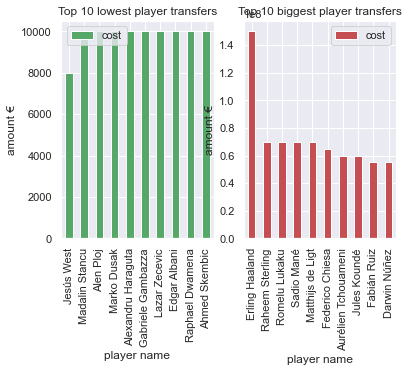

In [35]:
fig, axes = plt.subplots(ncols=2)

top_player.plot.bar(x='name',y='cost',color='r',ax=axes[1])
last_player.plot.bar(x='name',y='cost',color='g',ax=axes[0])


axes[1].set_title('Top 10 biggest player transfers')
axes[1].set_xlabel('player name')
axes[1].set_ylabel('amount €')

axes[0].set_title('Top 10 lowest player transfers')
axes[0].set_xlabel('player name')
axes[0].set_ylabel('amount €')

In [23]:
df.groupby(['age']).cost.describe()


,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15.0,4.0,13750.000000,7.500000e+03,10000.0,10000.0,10000.0,13750.0,25000.0
16.0,38.0,78157.894737,1.458499e+05,10000.0,10000.0,25000.0,93750.0,750000.0
17.0,210.0,127238.095238,3.617650e+05,10000.0,10000.0,25000.0,75000.0,4000000.0
18.0,1017.0,228033.431662,9.747564e+05,10000.0,25000.0,50000.0,100000.0,15000000.0
19.0,2314.0,218604.148660,1.053234e+06,10000.0,25000.0,50000.0,100000.0,20000000.0
20.0,2817.0,316272.630458,1.756985e+06,10000.0,25000.0,50000.0,125000.0,40000000.0
21.0,2984.0,395901.474531,3.152697e+06,10000.0,25000.0,75000.0,175000.0,150000000.0
22.0,2957.0,518892.458573,2.854645e+06,10000.0,50000.0,100000.0,200000.0,70000000.0
23.0,2674.0,467768.511593,2.308856e+06,8000.0,50000.0,100000.0,250000.0,60000000.0


In [22]:
df.groupby(['position']).cost.describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Attacking Midfield,2303.0,480175.857577,1.866688e+06,10000.0,50000.0,125000.0,250000.0,35000000.0
Central Midfield,3625.0,558106.206897,2.616871e+06,10000.0,50000.0,100000.0,250000.0,55000000.0
Centre-Back,5337.0,508924.489414,2.568413e+06,10000.0,50000.0,100000.0,250000.0,70000000.0
Centre-Forward,4997.0,600261.156694,3.350392e+06,10000.0,50000.0,125000.0,300000.0,150000000.0
Defensive Midfield,2488.0,543456.591640,2.608743e+06,10000.0,50000.0,125000.0,250000.0,60000000.0
Goalkeeper,3359.0,231847.275975,8.930518e+05,10000.0,25000.0,75000.0,150000.0,18000000.0
Left Midfield,414.0,267620.772947,1.307946e+06,10000.0,50000.0,100000.0,200000.0,24000000.0
Left Winger,2260.0,625469.026549,2.931121e+06,10000.0,50000.0,125000.0,300000.0,70000000.0
Left-Back,2360.0,471281.779661,2.097916e+06,10000.0,50000.0,100000.0,250000.0,40000000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33621 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33616 non-null  object 
 1   position             33611 non-null  object 
 2   age                  33473 non-null  float64
 3   origin_club          33616 non-null  object 
 4   league_origin_club   32681 non-null  object 
 5   country_origin_club  32686 non-null  object 
 6   new_club             33611 non-null  object 
 7   league_new_club      28047 non-null  object 
 8   country_new_club     28051 non-null  object 
 9   cost                 33621 non-null  int32  
 10  date_of_transfer     33621 non-null  object 
dtypes: float64(1), int32(1), object(9)
memory usage: 2.9+ MB


In [8]:
df.isna().apply(pd.value_counts)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
False,33616,33611,33473,33616,32681,32686,33611,28047,28051,33621.0,33621.0
True,5,10,148,5,940,935,10,5574,5570,NaN,NaN


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,33473.0,25.020166,4.784703e+00,15.0,21.0,24.0,28.0,46.0
cost,33621.0,478310.817644,2.429271e+06,8000.0,50000.0,100000.0,250000.0,150000000.0


In [13]:
# Top10 Teams that spend the most money 
df.groupby("new_club").cost.sum().sort_values(ascending=False).head(10)

new_club
Without Club           805038000
Chelsea FC             271000000
FC Barcelona           262000000
Paris Saint-Germain    251000000
Manchester City        246000000
Juventus FC            229500000
Nottingham Forest      220625000
Bayern Munich          200125000
Tottenham Hotspur      180000000
Olympique Marseille    179500000
Name: cost, dtype: int32

In [29]:
# Top6 league that spend the most money 
df.groupby("league_new_club").cost.sum().sort_values(ascending=False).head(6)

league_new_club
Premier League    2.382685e+09
Serie A           1.732050e+09
LaLiga            1.181000e+09
Bundesliga        1.119275e+09
Ligue 1           1.060725e+09
Süper Lig         4.607100e+08
Name: cost, dtype: float64

<AxesSubplot:xlabel='age'>

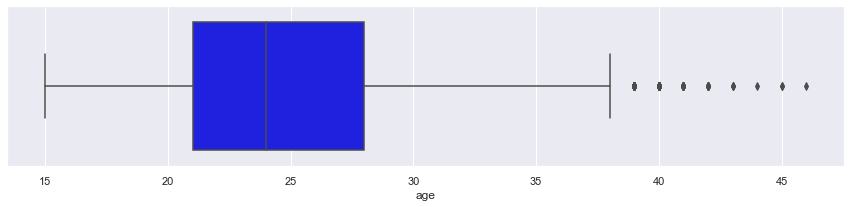

In [31]:
# Checking for the outliers
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.age, color='blue')


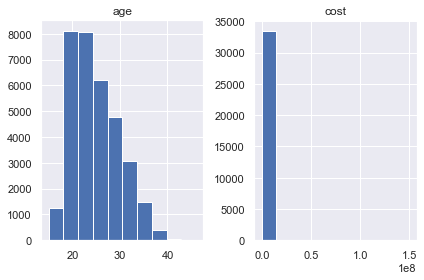

In [27]:
# Histogram
df.hist()
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Centre-Forward'),
  Text(1, 0, 'Central Midfield'),
  Text(2, 0, 'Centre-Back'),
  Text(3, 0, 'Defensive Midfield'),
  Text(4, 0, 'Left Winger'),
  Text(5, 0, 'Attacking Midfield'),
  Text(6, 0, 'Left-Back'),
  Text(7, 0, 'Second Striker'),
  Text(8, 0, 'Right Winger'),
  Text(9, 0, 'Goalkeeper'),
  Text(10, 0, 'defence'),
  Text(11, 0, 'Right-Back'),
  Text(12, 0, 'midfield'),
  Text(13, 0, 'Right Midfield'),
  Text(14, 0, 'Left Midfield'),
  Text(15, 0, 'attack')])

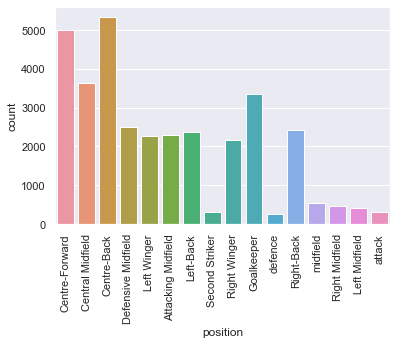

In [12]:
sns.countplot(x='position',data=df)
plt.xticks(rotation=90)

<AxesSubplot:>

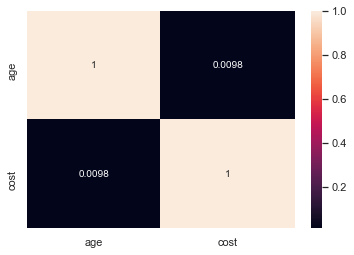

In [32]:
# Correlation Heatmap
sns.heatmap(df.corr(),annot=True)